<a href="https://colab.research.google.com/github/Zakariae4AL/Projet_Data_Mining/blob/main/DataMining_HeartDesease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Libraries & Dataset***





> importer tous les libraries nécessaires

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



> impoter Heart Desease Dataframe



In [ ]:
csv_file = pd.read_csv('heart_statlog_cleveland_hungary_final.csv')
initial_dataframe = pd.DataFrame(csv_file)
initial_dataframe

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1




> Visualisation de Dataframe



In [ ]:
# Séparation des caractéristiques et de la cible
X = initial_dataframe.drop('target', axis=1)
y = initial_dataframe['target']
print("\nDimensions des données :\n", X.shape, y.shape)


Dimensions des données :
 (1190, 11) (1190,)


In [ ]:
initial_dataframe.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [ ]:
initial_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [ ]:
initial_dataframe.isnull().sum()

,0
age,0
sex,0
chest pain type,0
resting bp s,0
cholesterol,0
fasting blood sugar,0
resting ecg,0
max heart rate,0
exercise angina,0
oldpeak,0


In [ ]:
numerical_df = initial_dataframe[['age','resting bp s','cholesterol','max heart rate','oldpeak']]
categorial_df = initial_dataframe[
    ['sex','chest pain type','fasting blood sugar','resting ecg','exercise angina','ST slope']
    ]

# ***Recursive feature elimination***



 #### SVM



In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load and prepare data
raw_data = pd.read_csv("heart_statlog_cleveland_hungary_final.csv")
X = raw_data.drop(columns="target").values
y = raw_data["target"].values
Z = raw_data.drop('target', axis=1)
# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# RFE with SVM
svm = SVC(kernel="linear")
rfe = RFE(estimator=svm, n_features_to_select=5)
rfe.fit(X, y)
selected_features_svm = np.where(rfe.support_ == True)[0]

# Evaluate RFE with SVM
X_selected_svm = X[:, selected_features_svm]
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X_selected_svm, y, test_size=0.3, random_state=42)
model_svm = SVC(kernel="linear")
model_svm.fit(X_train_svm, y_train_svm)
y_pred_svm = model_svm.predict(X_test_svm)
accuracy_svm = accuracy_score(y_test_svm, y_pred_svm)

# Print results
selected_features_name = [Z.columns[i] for i in selected_features_svm]

print("Selected Features (RFE with SVM):", selected_features_svm)
print("Selected Feature Names (RFE with SVM):", selected_features_name)
print(f"Accuracy (RFE with SVM): {accuracy_svm * 100:.2f}%")


Selected Features (RFE with SVM): [ 1  2  8  9 10]
Selected Feature Names (RFE with SVM): ['sex', 'chest pain type', 'exercise angina', 'oldpeak', 'ST slope']
Accuracy (RFE with SVM): 84.87%




#### Firefly Algorithm



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import euclidean

# Firefly Algorithm Implementation
def firefly_algorithm(data, target, n_features, n_fireflies=20, max_iter=50, alpha=0.5, beta_min=0.2, gamma=1):
    # Initialize fireflies with random subsets of features
    n_total_features = data.shape[1]
    fireflies = np.random.randint(2, size=(n_fireflies, n_total_features)).astype(float) # Change to float

    def evaluate_firefly(firefly):
        # Train model and return accuracy for selected features
        selected_features = np.where(firefly == 1)[0]
        if len(selected_features) == 0:
            return 0  # No features selected, low fitness
        X_selected = data[:, selected_features]
        X_train, X_test, y_train, y_test = train_test_split(X_selected, target, test_size=0.3, random_state=42)
        model = RandomForestClassifier(random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        return accuracy_score(y_test, y_pred)

    # Fitness evaluation
    fitness = np.array([evaluate_firefly(f) for f in fireflies])

    for _ in range(max_iter):
        for i in range(n_fireflies):
            for j in range(n_fireflies):
                if fitness[i] < fitness[j]:  # Move firefly i towards firefly j
                    r = euclidean(fireflies[i], fireflies[j])
                    beta = beta_min + (1 - beta_min) * np.exp(-gamma * r ** 2)
                    movement = alpha * np.random.uniform(-0.5, 0.5, size=n_total_features)
                    fireflies[i] += beta * (fireflies[j] - fireflies[i]) + movement
                    fireflies[i] = np.clip(fireflies[i], 0, 1)
                    fireflies[i] = (fireflies[i] > 0.5).astype(int) # Back to int for feature selection

        # Update fitness
        fitness = np.array([evaluate_firefly(f) for f in fireflies])

    # Return the best solution
    best_firefly = fireflies[np.argmax(fitness)]
    best_features = np.where(best_firefly == 1)[0]
    return best_features, max(fitness)

# Load and prepare data
raw_data = pd.read_csv("heart_statlog_cleveland_hungary_final.csv")
X = raw_data.drop(columns="target").values
y = raw_data["target"].values
Z = raw_data.drop('target', axis=1)
# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Apply Firefly Algorithm for feature selection
selected_features_fa, best_score_fa = firefly_algorithm(X, y, n_features=5)

# RFE with SVM
svm = SVC(kernel="linear")
rfe = RFE(estimator=svm, n_features_to_select=5)
rfe.fit(X, y)
selected_features_svm = np.where(rfe.support_ == True)[0]

# Evaluate RFE with SVM
X_selected_svm = X[:, selected_features_svm]
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(X_selected_svm, y, test_size=0.3, random_state=42)
model_svm = SVC(kernel="linear")
model_svm.fit(X_train_svm, y_train_svm)
y_pred_svm = model_svm.predict(X_test_svm)
accuracy_svm = accuracy_score(y_test_svm, y_pred_svm)

# Print results
selected_features_name = [Z.columns[i] for i in selected_features_fa]

print("Selected Features (Firefly Algorithm):", selected_features_fa)
print("Selected Feature Names (Firefly Algorithm):", selected_features_name)
print(f"Best Accuracy (Firefly Algorithm): {best_score_fa * 100:.2f}%")


Selected Features (Firefly Algorithm): [ 1  2  4  5  6  7  9 10]
Selected Feature Names (Firefly Algorithm): ['sex', 'chest pain type', 'cholesterol', 'fasting blood sugar', 'resting ecg', 'max heart rate', 'oldpeak', 'ST slope']
Best Accuracy (Firefly Algorithm): 92.16%




#### Naive Bayes



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score

# Charger les données
data = pd.read_csv('heart_statlog_cleveland_hungary_final.csv')

# Supposer que la dernière colonne est la cible (target) et les autres sont les caractéristiques (features)
X = data.drop('target', axis=1)  # Remplacez 'target' par le nom réel de la colonne cible dans votre dataset
y = data['target']  # Remplacez 'target' par le nom réel de la colonne cible

# Diviser le dataset en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisation des caractéristiques (important pour certains algorithmes)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Sélectionner les K meilleures caractéristiques avec SelectKBest
selector = SelectKBest(score_func=f_classif, k=5)  # Sélectionner les 5 meilleures caractéristiques
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Entraîner un modèle Naive Bayes avec les caractéristiques sélectionnées
naive_bayes = GaussianNB()
naive_bayes.fit(X_train_selected, y_train)

# Prédictions et évaluation du modèle
y_pred = naive_bayes.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Afficher les caractéristiques sélectionnées
selected_features = X.columns[selector.get_support()]
print(f'Caractéristiques sélectionnées : {selected_features}')


Accuracy: 82.35%
Caractéristiques sélectionnées : Index(['chest pain type', 'max heart rate', 'exercise angina', 'oldpeak',
       'ST slope'],
      dtype='object')


# ***Exhaustive feature selection***



#### SVM



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

# Charger les données
print("Chargement des données...")
data = pd.read_csv('heart_statlog_cleveland_hungary_final.csv')

# Séparer les caractéristiques (X) et la variable cible (y)
X = data.drop('target', axis=1)
y = data['target']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normaliser les caractéristiques
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Créer le modèle SVM
svm = SVC(kernel='rbf', random_state=42)

# Configurer la sélection exhaustive des caractéristiques
print("Démarrage de la sélection exhaustive des caractéristiques...")
efs = EFS(svm,
          min_features=1,
          max_features=len(X.columns),
          scoring='accuracy',
          print_progress=True,
          cv=5)

# Effectuer la sélection des caractéristiques
efs = efs.fit(X_train_scaled, y_train)

# Afficher les meilleures caractéristiques
print("Meilleures caractéristiques:", efs.best_feature_names_)

# Utiliser les meilleures caractéristiques pour l'entraînement final
X_train_best = X_train_scaled[:, efs.best_idx_]
X_test_best = X_test_scaled[:, efs.best_idx_]

# Entraîner le modèle final
print("Entraînement du modèle final...")
svm_final = SVC(kernel='rbf', random_state=42)
svm_final.fit(X_train_best, y_train)

# Évaluer le modèle
y_pred = svm_final.predict(X_test_best)
accuracy = accuracy_score(y_test, y_pred)
print(f"Précision du modèle final: {accuracy:.4f}")

# Afficher les noms des caractéristiques sélectionnées
selected_features = [X.columns[i] for i in efs.best_idx_]
print("Caractéristiques sélectionnées:", selected_features)

Chargement des données...
Démarrage de la sélection exhaustive des caractéristiques...


Features: 2047/2047

Meilleures caractéristiques: ('0', '1', '2', '4', '5', '6', '8', '9', '10')
Entraînement du modèle final...
Précision du modèle final: 0.8908
Caractéristiques sélectionnées: ['age', 'sex', 'chest pain type', 'cholesterol', 'fasting blood sugar', 'resting ecg', 'exercise angina', 'oldpeak', 'ST slope']




#### Firefly Algorithm



In [ ]:
# Importation des bibliothèques nécessaires
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFECV
from sklearn.base import clone
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from math import exp, sqrt, sin, cos
import random
import seaborn as sns

# Chargement des données
data = pd.read_csv('heart_statlog_cleveland_hungary_final.csv')
data.columns = ['age', 'sex', 'chest_pain', 'resting_bp', 'cholesterol', 'fasting_bs', 'resting_ecg', 'max_hr', 'exercise_angina', 'oldpeak', 'st_slope', 'target']

# Séparation des caractéristiques et de la cible
X = data.drop('target', axis=1)
y = data['target']

# Normalisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Algorithme Firefly pour la sélection de caractéristiques
def firefly_algorithm(X, y, n_fireflies=20, max_gen=50, alpha=0.5, beta_min=0.2, gamma=1.0):
    n_features = X.shape[1]

    # Initialisation des lucioles (chaque luciole est un vecteur binaire représentant les caractéristiques sélectionnées)
    fireflies = np.random.randint(2, size=(n_fireflies, n_features))

    # Calcul de la luminosité initiale (basée sur la précision d'un modèle Naive Bayes)
    def fitness(solution):
        selected_features = np.where(solution == 1)[0]
        if len(selected_features) == 0:
            return 0
        X_selected = X[:, selected_features]
        model = GaussianNB()
        model.fit(X_train[:, selected_features], y_train)
        predictions = model.predict(X_test[:, selected_features])
        return accuracy_score(y_test, predictions)

    brightness = np.array([fitness(firefly) for firefly in fireflies])

    # Variable pour stocker le meilleur score
    best_brightness = max(brightness)

    # Mise à jour des lucioles à chaque génération
    for gen in range(max_gen):
        for i in range(n_fireflies):
            for j in range(n_fireflies):
                if brightness[j] > brightness[i]:
                    r = np.linalg.norm(fireflies[i] - fireflies[j])
                    beta = beta_min + (1 - beta_min) * exp(-gamma * r**2)
                    fireflies[i] = np.clip(fireflies[i] + beta * (fireflies[j] - fireflies[i]) + alpha * (np.random.rand(n_features) - 0.5), 0, 1)
                    fireflies[i] = np.where(fireflies[i] > 0.5, 1, 0)
                    brightness[i] = fitness(fireflies[i])

        # Mise à jour du meilleur score si une meilleure solution est trouvée
        best_brightness = max(best_brightness, max(brightness))

    # Retourner uniquement le meilleur score
    return best_brightness

# Application de l'algorithme Firefly
best_score = firefly_algorithm(X_train, y_train)
print(f"Meilleur score obtenu : {best_score* 100:.2f}%")


Meilleur score obtenu : 86.13%


#### Naive Bayes





Caractéristiques sélectionnées : ['age', 'sex', 'chest_pain', 'resting_bp', 'cholesterol', 'fasting_bs', 'resting_ecg', 'max_hr', 'exercise_angina', 'oldpeak', 'st_slope']

Précision du modèle avec les caractéristiques sélectionnées : 85.71%


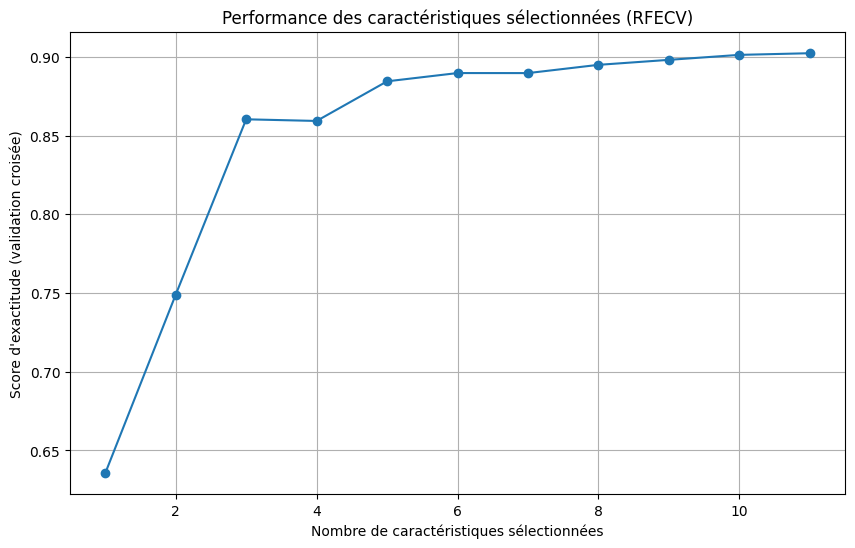

In [ ]:
# Importation des bibliothèques nécessaires
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Chargement des données
data = pd.read_csv('heart_statlog_cleveland_hungary_final.csv')
data.columns = ['age', 'sex', 'chest_pain', 'resting_bp', 'cholesterol', 'fasting_bs', 'resting_ecg',
                'max_hr', 'exercise_angina', 'oldpeak', 'st_slope', 'target']

# Séparation des caractéristiques et de la cible
X = data.drop('target', axis=1)
y = data['target']

# Normalisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Sélection des caractéristiques avec RFECV
rf = RandomForestClassifier(random_state=42)
selector = RFECV(estimator=rf, step=1, cv=5, scoring='accuracy')
selector.fit(X_train, y_train)

# Caractéristiques sélectionnées
selected_features = selector.support_
selected_feature_indices = np.where(selected_features)[0]  # Indices des colonnes sélectionnées
selected_feature_names = X.columns[selected_features]

print(f"Caractéristiques sélectionnées : {list(selected_feature_names)}")

# Entraînement du modèle Naive Bayes avec les meilleures caractéristiques
X_train_selected = X_train[:, selected_feature_indices]
X_test_selected = X_test[:, selected_feature_indices]

model = GaussianNB()
model.fit(X_train_selected, y_train)
predictions = model.predict(X_test_selected)

# Évaluation du modèle
accuracy = accuracy_score(y_test, predictions)
print(f"\nPrécision du modèle avec les caractéristiques sélectionnées : {accuracy * 100:.2f}%")

# Visualisation des performances
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(selector.cv_results_['mean_test_score']) + 1),
         selector.cv_results_['mean_test_score'],
         marker='o')
plt.title("Performance des caractéristiques sélectionnées (RFECV)")
plt.xlabel("Nombre de caractéristiques sélectionnées")
plt.ylabel("Score d'exactitude (validation croisée)")
plt.grid()
plt.show()



# ***Backward selection***





#### SVM



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Load the data
data = pd.read_csv('heart_statlog_cleveland_hungary_final.csv')

# Separate features and target
X = data.drop('target', axis=1)
y = data['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

def backward_selection_svm(X, y):
    features = list(X.columns)
    best_score = 0
    while len(features) > 1:
        scores = []
        for feature in features:
            temp_features = [f for f in features if f != feature]
            X_temp = X[temp_features]
            X_train, X_test, y_train, y_test = train_test_split(X_temp, y, test_size=0.2, random_state=42)

            scaler = StandardScaler()
            X_train_scaled = scaler.fit_transform(X_train)
            X_test_scaled = scaler.transform(X_test)

            svm = SVC(kernel='rbf', random_state=42)
            svm.fit(X_train_scaled, y_train)
            score = svm.score(X_test_scaled, y_test)
            scores.append((score, feature))

        scores.sort(reverse=True)
        best_new_score, worst_feature = scores[-1]

        if best_new_score > best_score:
            best_score = best_new_score
            features.remove(worst_feature)
            print(f"Removed feature: {worst_feature}, New best score: {best_score}")
        else:
            break

    return features

# Perform backward selection
selected_features = backward_selection_svm(X, y)

print("\nFinal selected features:", selected_features)

# Train the final model with selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

final_svm = SVC(kernel='rbf', random_state=42)
final_svm.fit(X_train_scaled, y_train)

# Evaluate the final model
y_pred = final_svm.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nFinal model accuracy: {accuracy:.4f}")

Removed feature: ST slope, New best score: 0.8445378151260504

Final selected features: ['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol', 'fasting blood sugar', 'resting ecg', 'max heart rate', 'exercise angina', 'oldpeak']

Final model accuracy: 0.8445




#### Firefly Algorithm



In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load the data
data = pd.read_csv('heart_statlog_cleveland_hungary_final.csv')
X = data.drop('target', axis=1)
y = data['target']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

def evaluate_features(X, y, features):
    X_selected = X[:, features]
    svm = SVC(kernel='rbf', random_state=42)
    svm.fit(X_selected, y)
    return svm.score(X_selected, y)

def simple_firefly_backward_selection(X, y, n_fireflies=5, n_iterations=10):
    n_features = X.shape[1]
    best_score = 0
    best_features = list(range(n_features))

    for _ in range(n_iterations):
        fireflies = [np.random.choice(best_features, size=np.random.randint(1, len(best_features)+1), replace=False) for _ in range(n_fireflies)]

        scores = [evaluate_features(X, y, f) for f in fireflies]
        best_idx = np.argmax(scores)

        if scores[best_idx] > best_score:
            best_score = scores[best_idx]
            best_features = fireflies[best_idx]

    return best_features

# Perform simplified backward selection using Firefly Algorithm
selected_features = simple_firefly_backward_selection(X_train_scaled, y_train)

print("Selected features:", X.columns[selected_features].tolist())

# Train the final model with selected features
X_train_selected = X_train_scaled[:, selected_features]
X_test_selected = X_test_scaled[:, selected_features]

final_svm = SVC(kernel='rbf', random_state=42)
final_svm.fit(X_train_selected, y_train)

# Evaluate the final model
y_pred = final_svm.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)
print(f"Final model accuracy: {accuracy:.4f}")

Selected features: ['fasting blood sugar', 'resting ecg', 'resting bp s', 'age', 'exercise angina', 'oldpeak', 'max heart rate', 'sex', 'cholesterol', 'chest pain type', 'ST slope']
Final model accuracy: 0.8908




#### Naive Bayes



1- Importations

Features restantes : ['sex', 'chest pain type', 'resting bp s', 'cholesterol', 'fasting blood sugar', 'resting ecg', 'max heart rate', 'exercise angina', 'oldpeak', 'ST slope']
Score actuel : 0.8571

Meilleures caractéristiques sélectionnées : ['sex', 'chest pain type', 'resting bp s', 'cholesterol', 'fasting blood sugar', 'resting ecg', 'max heart rate', 'exercise angina', 'oldpeak', 'ST slope']
Score d'exactitude optimal : 0.8571


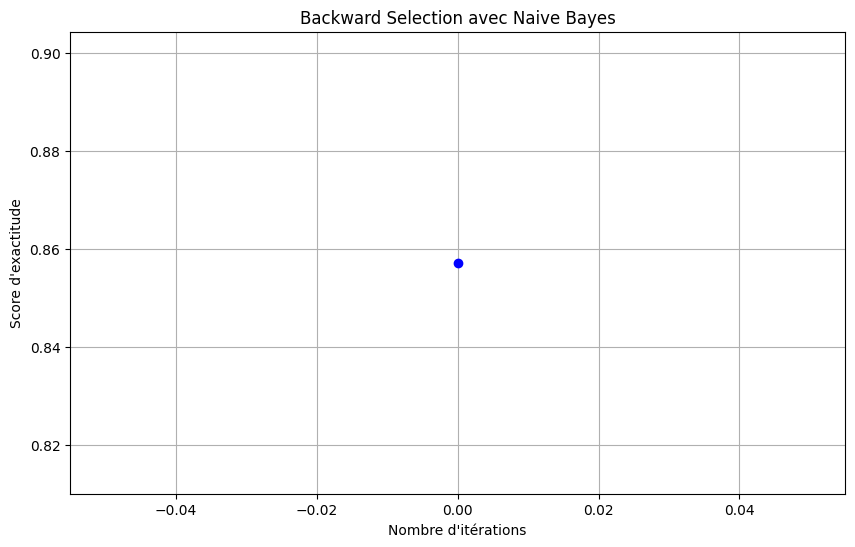

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

# Charger le dataset
data = pd.read_csv("heart_statlog_cleveland_hungary_final.csv")  # Remplacez par le chemin de votre fichier
X = data.drop("target", axis=1)  # Remplacez "target" par votre colonne cible
y = data["target"]

# Diviser les données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Backward Selection
def backward_selection(X_train, y_train, X_test, y_test):
    features = list(X_train.columns)
    best_features = features.copy()
    best_score = 0
    scores = []

    while len(features) > 0:
        current_best_score = 0
        feature_to_remove = None

        for feature in features:
            # Tester le modèle sans cette caractéristique
            reduced_features = [f for f in features if f != feature]
            clf = GaussianNB()
            clf.fit(X_train[reduced_features], y_train)
            y_pred = clf.predict(X_test[reduced_features])
            score = accuracy_score(y_test, y_pred)

            if score > current_best_score:
                current_best_score = score
                feature_to_remove = feature

        # Mettre à jour les meilleures caractéristiques et le score
        if current_best_score > best_score:
            best_score = current_best_score
            best_features = [f for f in features if f != feature_to_remove]
            features.remove(feature_to_remove)
        else:
            break  # Arrêter si aucune amélioration n'est obtenue

        scores.append(best_score)
        print(f"Features restantes : {features}")
        print(f"Score actuel : {best_score:.4f}")

    return best_features, best_score, scores

# Appliquer la sélection
best_features, best_score, scores = backward_selection(X_train, y_train, X_test, y_test)

# Afficher les résultats
print("\nMeilleures caractéristiques sélectionnées :", best_features)
print("Score d'exactitude optimal :", round(best_score, 4))

# Visualisation des performances
plt.figure(figsize=(10, 6))
plt.plot(range(len(scores)), scores, marker='o', color='b')
plt.title("Backward Selection avec Naive Bayes")
plt.xlabel("Nombre d'itérations")
plt.ylabel("Score d'exactitude")
plt.grid()
plt.show()


# ***Forward selection***



#### SVM



In [ ]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Forward Selection Function
def forward_selection(data, target):
    n_features = data.shape[1]
    selected_features = []
    best_accuracy = 0

    while len(selected_features) < n_features:
        remaining_features = [f for f in range(n_features) if f not in selected_features]
        best_feature = None

        for feature in remaining_features:
            current_features = selected_features + [feature]
            X_selected = data[:, current_features]
            X_train, X_test, y_train, y_test = train_test_split(X_selected, target, test_size=0.3, random_state=42)

            model = SVC(kernel="linear", random_state=42)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)

            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_feature = feature

        if best_feature is not None:
            selected_features.append(best_feature)
        else:
            break

    return selected_features, best_accuracy

# Load and prepare data
raw_data = pd.read_csv("heart_statlog_cleveland_hungary_final.csv")
X = raw_data.drop(columns="target").values
y = raw_data["target"].values
Z = raw_data.drop('target', axis=1)
# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Apply Forward Selection with SVM
selected_features, best_accuracy = forward_selection(X, y)
selected_features_name = [Z.columns[i] for i in selected_features]

print("Selected Features:", selected_features)
print("Selected Feature Names (Forward Selection with Naive Bayes):", selected_features_name)
print(f"Best Accuracy: {best_accuracy * 100:.2f}%")


Selected Features: [10]
Selected Feature Names (Forward Selection with Naive Bayes): ['ST slope']
Best Accuracy: 80.11%




#### Firefly Algorithm



Iteration 1/30, Best Score: 0.9104
Iteration 2/30, Best Score: 0.9104
Iteration 3/30, Best Score: 0.9104
Iteration 4/30, Best Score: 0.9104
Iteration 5/30, Best Score: 0.9104
Iteration 6/30, Best Score: 0.9104
Iteration 7/30, Best Score: 0.9104
Iteration 8/30, Best Score: 0.9104
Iteration 9/30, Best Score: 0.9104
Iteration 10/30, Best Score: 0.9104
Iteration 11/30, Best Score: 0.9104
Iteration 12/30, Best Score: 0.9104
Iteration 13/30, Best Score: 0.9104
Iteration 14/30, Best Score: 0.9104
Iteration 15/30, Best Score: 0.9104
Iteration 16/30, Best Score: 0.9104
Iteration 17/30, Best Score: 0.9104
Iteration 18/30, Best Score: 0.9104
Iteration 19/30, Best Score: 0.9104
Iteration 20/30, Best Score: 0.9104
Iteration 21/30, Best Score: 0.9104
Iteration 22/30, Best Score: 0.9104
Iteration 23/30, Best Score: 0.9104
Iteration 24/30, Best Score: 0.9104
Iteration 25/30, Best Score: 0.9104
Iteration 26/30, Best Score: 0.9104
Iteration 27/30, Best Score: 0.9104
Iteration 28/30, Best Score: 0.9104
I

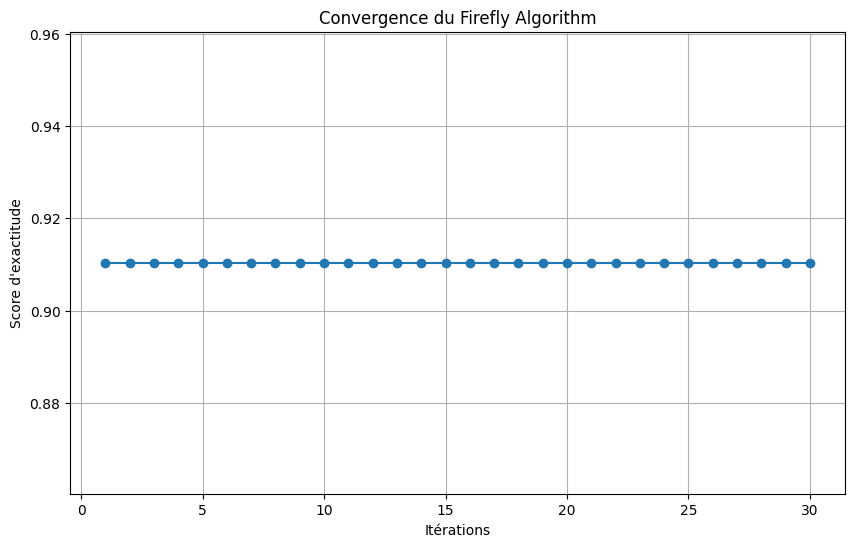

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Charger le dataset
data = pd.read_csv("heart_statlog_cleveland_hungary_final.csv")  # Remplacez par le chemin de votre fichier
X = data.drop("target", axis=1)  # Remplacez "target" par votre colonne cible
y = data["target"]

# Diviser les données
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Paramètres du Firefly Algorithm
n_fireflies = 10
n_iterations = 30
gamma = 1  # Coefficient d'attraction
beta_min = 0.2
alpha = 0.5

# Initialisation aléatoire des lucioles
def initialize_fireflies(n_fireflies, n_features):
    return np.random.randint(2, size=(n_fireflies, n_features))

# Fonction pour évaluer une luciole (sous-ensemble de caractéristiques)
def evaluate_firefly(firefly, X_train, y_train, X_test, y_test):
    selected_features = [i for i in range(len(firefly)) if firefly[i] == 1]
    if not selected_features:  # Si aucune caractéristique n'est sélectionnée
        return 0
    clf = RandomForestClassifier(random_state=42)
    clf.fit(X_train[:, selected_features], y_train)
    y_pred = clf.predict(X_test[:, selected_features])
    return accuracy_score(y_test, y_pred)

# Fonction pour déplacer une luciole
def move_firefly(firefly1, firefly2, beta, alpha):
    attraction = beta * (firefly2 - firefly1)
    random_factor = alpha * (np.random.rand(len(firefly1)) - 0.5)
    new_position = firefly1 + attraction + random_factor
    return np.clip(np.round(new_position), 0, 1)

# Algorithme Firefly
def firefly_algorithm(X_train, y_train, X_test, y_test, n_fireflies, n_iterations):
    n_features = X_train.shape[1]
    fireflies = initialize_fireflies(n_fireflies, n_features)
    best_firefly = None
    best_score = -1
    scores = []

    for iteration in range(n_iterations):
        luminosities = np.array([
            evaluate_firefly(firefly, X_train, y_train, X_test, y_test)
            for firefly in fireflies
        ])

        for i in range(n_fireflies):
            for j in range(n_fireflies):
                if luminosities[j] > luminosities[i]:
                    beta = beta_min + (1 - beta_min) * np.exp(-gamma * np.linalg.norm(fireflies[i] - fireflies[j]) ** 2)
                    fireflies[i] = move_firefly(fireflies[i], fireflies[j], beta, alpha)

        # Mettre à jour la meilleure solution
        max_idx = np.argmax(luminosities)
        if luminosities[max_idx] > best_score:
            best_score = luminosities[max_idx]
            best_firefly = fireflies[max_idx]
        scores.append(best_score)
        print(f"Iteration {iteration+1}/{n_iterations}, Best Score: {best_score:.4f}")

    return best_firefly, best_score, scores

# Appliquer l'algorithme
X_train_np = X_train.values
X_test_np = X_test.values
best_firefly, best_score, scores = firefly_algorithm(X_train_np, y_train.values, X_test_np, y_test.values, n_fireflies, n_iterations)

# Afficher les résultats
selected_features = [i for i in range(len(best_firefly)) if best_firefly[i] == 1]
print(f"Meilleures caractéristiques sélectionnées : {selected_features}")
print(f"Score d'exactitude optimal : {best_score:.4f}")

# Visualisation des scores
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(scores) + 1), scores, marker='o')
plt.title("Convergence du Firefly Algorithm")
plt.xlabel("Itérations")
plt.ylabel("Score d'exactitude")
plt.grid()
plt.show()




#### Naive Bayes



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Forward Selection Function
def forward_selection_nb(data, target):
    """
    Performs forward feature selection using Naive Bayes.

    Args:
        data (pd.DataFrame): The input data with features.
        target (pd.Series): The target variable.

    Returns:
        tuple: Selected features and best accuracy.
    """
    n_features = data.shape[1]
    selected_features = []
    best_accuracy = 0

    while len(selected_features) < n_features:
        remaining_features = [f for f in range(n_features) if f not in selected_features]
        best_feature = None

        for feature in remaining_features:
            current_features = selected_features + [feature]
            X_selected = data[:, current_features]  # Select current features

            # Split data
            X_train, X_test, y_train, y_test = train_test_split(
                X_selected, target, test_size=0.3, random_state=42
            )

            # Train and evaluate Naive Bayes
            model = GaussianNB()
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)

            # Update best feature and accuracy if improved
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_feature = feature

        # Add best feature to selected features
        if best_feature is not None:
            selected_features.append(best_feature)
        else:
            break  # Stop if no improvement

    return selected_features, best_accuracy

# Load and prepare data
raw_data = pd.read_csv("heart_statlog_cleveland_hungary_final.csv")
X = raw_data.drop(columns="target").values
y = raw_data["target"].values
Z = raw_data.drop('target', axis=1)
# Standardize features (important for Naive Bayes)
scaler = StandardScaler()
X = scaler.fit_transform(X)


# Apply Forward Selection with Naive Bayes
selected_features, best_accuracy = forward_selection_nb(X, y)

selected_features_name = [Z.columns[i] for i in selected_features]
print("Selected Features (Forward Selection with Naive Bayes):", selected_features)
print("Selected Feature Names (Forward Selection with Naive Bayes):", selected_features_name)
print(f"Best Accuracy (Forward Selection with Naive Bayes): {best_accuracy * 100:.2f}%")

Selected Features (Forward Selection with Naive Bayes): [10, 4, 1, 9]
Selected Feature Names (Forward Selection with Naive Bayes): ['ST slope', 'cholesterol', 'sex', 'oldpeak']
Best Accuracy (Forward Selection with Naive Bayes): 84.87%
